In [1]:
import numpy as np
import scipy as sp
import numpy.random as random
import vegas

Particle class

In [2]:
class particle:
     def __init__(self, alive, mu, x, weight):
        self.alive = alive
        self.mu = mu
        self.x = x
        self.weight = weight

Monte Carlo function with inputs

$\sigma_s$, $\sigma_a$, $q_0$, $L$, $W$

In [32]:
def mc_vegas(sigmaS, sigmaA, q, L, x, mu):
    sigmaT = sigmaS + sigmaA
    tally = np.zeros(2)
        
    #create particle
    if mu < 0:
        mu = -1
    else:
        mu = 1
    p = particle(True, mu, x, q)

    while p.alive:
        #calculate distance to collision
        distance_to_collision = abs(-np.log(random.random())/sigmaT)

        #calculate distance to boundary
        if p.mu == -1:
            distance_to_boundary = p.x
        elif p.mu == 1:
            distance_to_boundary = L-p.x

        #tally if distance to collision is greater than distance to boundary
        if distance_to_collision > distance_to_boundary:
            if p.mu == -1:
                tally[0] += p.weight
                p.alive = False
            elif p.mu == 1:
                tally[1] += p.weight
                p.alive = False
        else:
            p.x += p.mu*distance_to_collision
            if random.random() < sigmaA/sigmaT: #absorbed
                p.alive = False
            elif random.random() < 0.5: #backscatter
                    p.mu *= -1

    #return weighted sum and tally
    return [sum(tally)*p.weight, tally[0]*p.weight, tally[1]*p.weight]

In [14]:
def mc_normal(sigmaS, sigmaA, q, W, L, N):
    sigmaT = sigmaS + sigmaA
    tally = np.zeros(2)
     
        
    for i in range(N):
        #create particle
        x = W * np.random.random()
        mu = np.random.random()
        if mu < 0.5:
            mu = -1
        else:
            mu = 1
        p = particle(True, mu, x, q)

        while p.alive:
            #calculate distance to collision
            distance_to_collision = abs(-np.log(random.random())/sigmaT)

            #calculate distance to boundary
            if p.mu == -1:
                distance_to_boundary = p.x
            elif p.mu == 1:
                distance_to_boundary = L-p.x

            #tally if distance to collision is greater than distance to boundary
            if distance_to_collision > distance_to_boundary:
                if p.mu == -1:
                    tally[0] += p.weight
                    p.alive = False
                elif p.mu == 1:
                    tally[1] += p.weight
                    p.alive = False
            else:
                p.x += p.mu*distance_to_collision
                if random.random() < sigmaA/sigmaT: #absorbed
                    p.alive = False
                elif random.random() < 0.5: #backscatter
                        p.mu *= -1

    #return weighted sum and tally
    return [sum(tally)*p.weight, tally[0]*p.weight, tally[1]*p.weight]

### Normal Monte Carlo

In [34]:
sigmaS = 1
sigmaA = .1
q = 1
L = 5
W = 2

tally = mc_normal(sigmaS, sigmaA, q, W, L, 1000)

print('Total leakage = ', tally[0])
print('Left leakage = ', tally[1])
print('Right leakage = ', tally[2])

Total leakage =  703.0
Left leakage =  553.0
Right leakage =  150.0


### Vegas

In [35]:
sigmaS = 1
sigmaA = .1
q = 1
L = 5
W = 2

def f(x):
    return mc_vegas(sigmaS, sigmaA, q, L, x[0], x[1])
    
integ = vegas.Integrator([[0, W], [-1,1]])

result = integ(f, nitn=10, neval=1000)
print(result.summary())
print('Total leakage = ', result[0])
print('Left leakage = ', result[1])
print('Right leakage = ', result[2])

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   2.785(57)       2.785(57)           0.00     1.00
  2   2.869(56)       2.829(40)           0.59     0.62
  3   2.795(67)       2.816(34)           0.72     0.63
  4   2.757(62)       2.800(30)           0.78     0.63
  5   2.839(61)       2.808(27)           0.61     0.83
  6   2.825(58)       2.811(24)           0.50     0.94
  7   2.756(60)       2.803(23)           0.48     0.97
  8   2.891(57)       2.815(21)           0.58     0.94
  9   2.680(64)       2.800(20)           0.75     0.80
 10   2.757(63)       2.797(19)           0.70     0.88

Total leakage =  2.797(19)
Left leakage =  2.202(20)
Right leakage =  0.595(14)


#### Vegas Mapping

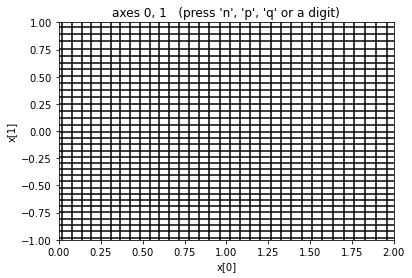

In [36]:
integ.map.show_grid(30)